In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [2]:
data = pd.read_csv(r"C:\Users\karju\Downloads\machine faliure.csv")
data

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298,308,1551,42,0,0,0,0,0,0,0
1,2,L47181,L,298,308,1408,46,3,0,0,0,0,0,0
2,3,L47182,L,298,308,1498,49,5,0,0,0,0,0,0
3,4,L47183,L,298,308,1433,39,7,0,0,0,0,0,0
4,5,L47184,L,298,308,1408,40,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298,308,1604,29,14,0,0,0,0,0,0
9996,9997,H39410,H,298,308,1632,31,17,0,0,0,0,0,0
9997,9998,M24857,M,299,308,1645,33,22,0,0,0,0,0,0
9998,9999,H39412,H,299,308,1408,48,25,0,0,0,0,0,0


In [3]:
data=data.drop("Product ID",axis=1)

In [4]:
data.shape

(10000, 13)

In [5]:
data.dtypes

UDI                         int64
Type                       object
Air temperature [K]         int64
Process temperature [K]     int64
Rotational speed [rpm]      int64
Torque [Nm]                 int64
Tool wear [min]             int64
Machine failure             int64
TWF                         int64
HDF                         int64
PWF                         int64
OSF                         int64
RNF                         int64
dtype: object

In [6]:
x=data.drop("Machine failure",axis=1)
y=data['Machine failure']

In [7]:
x

,UDI,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,1,M,298,308,1551,42,0,0,0,0,0,0
1,2,L,298,308,1408,46,3,0,0,0,0,0
2,3,L,298,308,1498,49,5,0,0,0,0,0
3,4,L,298,308,1433,39,7,0,0,0,0,0
4,5,L,298,308,1408,40,9,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M,298,308,1604,29,14,0,0,0,0,0
9996,9997,H,298,308,1632,31,17,0,0,0,0,0
9997,9998,M,299,308,1645,33,22,0,0,0,0,0
9998,9999,H,299,308,1408,48,25,0,0,0,0,0


In [8]:
y

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Machine failure, Length: 10000, dtype: int64

In [9]:
le_comp=LabelEncoder()
x['Type']=le_comp.fit_transform(x['Type'])


In [10]:
x

,UDI,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,1,2,298,308,1551,42,0,0,0,0,0,0
1,2,1,298,308,1408,46,3,0,0,0,0,0
2,3,1,298,308,1498,49,5,0,0,0,0,0
3,4,1,298,308,1433,39,7,0,0,0,0,0
4,5,1,298,308,1408,40,9,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,2,298,308,1604,29,14,0,0,0,0,0
9996,9997,0,298,308,1632,31,17,0,0,0,0,0
9997,9998,2,299,308,1645,33,22,0,0,0,0,0
9998,9999,0,299,308,1408,48,25,0,0,0,0,0


In [11]:
data.shape

(10000, 13)

In [12]:
pd.DataFrame(data= {'Number': data['Machine failure'].value_counts(), 
                    'Percent': data['Machine failure'].value_counts(normalize=True)})

,Number,Percent
Machine failure,,
0,9661,0.9661
1,339,0.0339


In [13]:
result_df = pd.DataFrame(data={
    'Number': data['Machine failure'].value_counts(),
    'Percent': data['Machine failure'].value_counts(normalize=True) * 100  # Multiply by 100 to get percentage
})

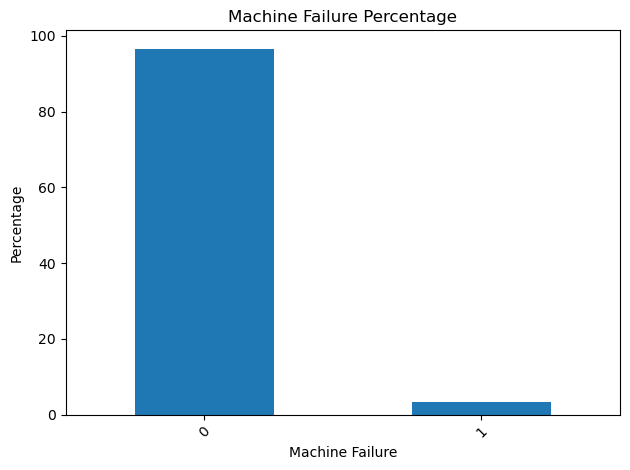

In [14]:
result_df.plot(kind='bar', y='Percent', legend=None)  # Plotting only the 'Percent' column
plt.xlabel('Machine Failure')
plt.ylabel('Percentage')
plt.title('Machine Failure Percentage')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=20)

In [16]:
scaler = MinMaxScaler()

In [17]:
model_params = {'random_forest':{'model':RandomForestClassifier(),'params':{'n_estimators':[1,5,10]}},'logistic_regression':{'model':LogisticRegression(),'params':{'C':[1,5,10]}}}

In [18]:
scores = []
models = ['random_forest','logistic_regression']
for model_name in models: 
    mp = model_params[model_name] 
    gds = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=True)
    gds.fit(x_train,y_train)
    scores.append({'model':model_name, 'best_score':gds.best_score_, 'best_params': gds.best_params_})

In [19]:
scores

[{'model': 'random_forest',
  'best_score': 0.9989333333333335,
  'best_params': {'n_estimators': 10}},
 {'model': 'logistic_regression',
  'best_score': 0.9793333333333333,
  'best_params': {'C': 1}}]

In [20]:
df = pd.DataFrame(scores)
df

,model,best_score,best_params
0,random_forest,0.998933,{'n_estimators': 10}
1,logistic_regression,0.979333,{'C': 1}


In [21]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [22]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [2]:
model.predict([[1,300.1,305.6,1561,45.8,1,0,0,0,0,0,0]])

C:\Users\karju\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [24]:
from sklearn.metrics import confusion_matrix
y_pred=model.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[2410    8]
 [  54   28]]


In [25]:
model.score(x_train,y_train)

0.9737333333333333

In [26]:
prediction_table1=pd.DataFrame({'True value':y_test,'predicted value':y_pred})
prediction_table1

,True value,predicted value
9957,0,0
1687,0,0
2116,0,0
231,0,0
2780,0,0
...,...,...
8514,0,0
5190,0,0
6766,0,0
347,0,0


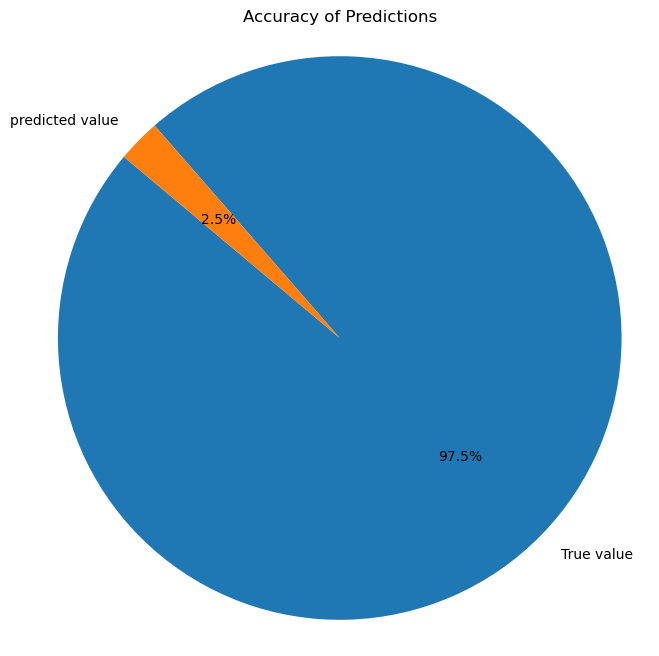

In [27]:
absolute_errors = abs(prediction_table1['True value'] - prediction_table1['predicted value'])
labels = ['True value', 'predicted value']
correct_predictions = (absolute_errors == 0).sum()
incorrect_predictions = (absolute_errors > 0).sum()
sizes = [correct_predictions, incorrect_predictions]
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Accuracy of Predictions')
plt.axis('equal')  
plt.show()

Text(50.722222222222214, 0.5, 'Predictions')

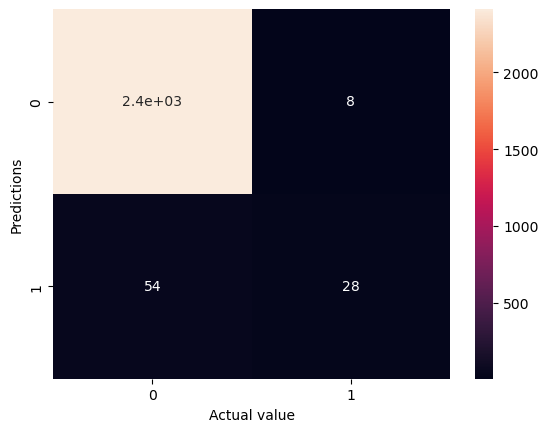

In [28]:
import seaborn as sns
sns.heatmap(cm,annot=True)
plt.xlabel('Actual value')
plt.ylabel('Predictions')

In [29]:
#svm

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=23)

# Scale the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Define kernel parameters
kernel_params = {
    'rbf': {},
    'linear': {},
    'poly': {'degree': 3, 'gamma': 15, 'C': 200},
    'sigmoid': {'gamma': 100, 'C': 5}
}

scores_dict = {'Kernel': [], 'Score': []}

# Train and evaluate models for each kernel
for kernel, params in kernel_params.items():
    svc_model = SVC(kernel=kernel, **params)
    svc_model.fit(x_train, y_train)
    score = svc_model.score(x_test, y_test)
    scores_dict['Kernel'].append(kernel)
    scores_dict['Score'].append(score)

# Convert dictionary to DataFrame
scores_df = pd.DataFrame(scores_dict)

print(scores_df)

    Kernel   Score
0      rbf  0.9996
1   linear  0.9996
2     poly  0.9916
3  sigmoid  0.9332


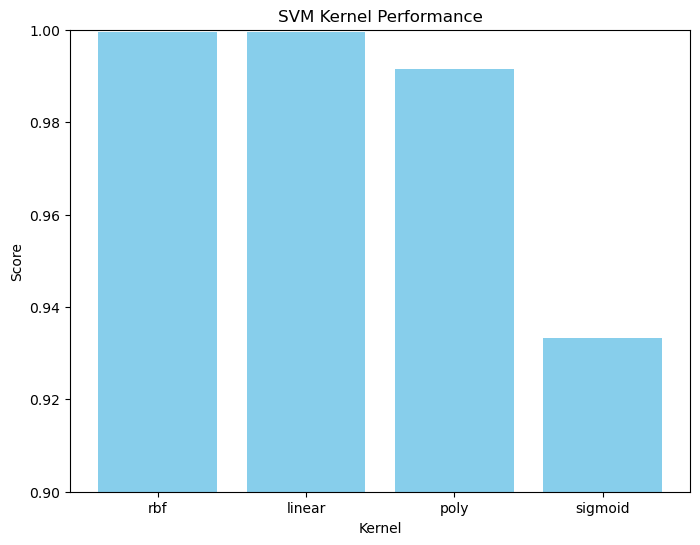

In [30]:
plt.figure(figsize=(8, 6))
plt.bar(scores_df['Kernel'], scores_df['Score'], color='skyblue')
plt.xlabel('Kernel')
plt.ylabel('Score')
plt.title('SVM Kernel Performance')
plt.ylim(0.9, 1.0)  # Set the y-axis limits for better visualization
plt.show()

In [31]:
from sklearn.naive_bayes import GaussianNB
model= GaussianNB()

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=88)

In [33]:
model.fit(x_train,y_train)

GaussianNB()

In [34]:
test_accuracy = model.score(x_test, y_test)
train_accuracy = model.score(x_train, y_train)
accuracy_dict = {
    'Dataset': ['Training', 'Testing'],
    'Accuracy': [train_accuracy, test_accuracy]
}
accuracy_df = pd.DataFrame(accuracy_dict)

print(accuracy_df)

    Dataset  Accuracy
0  Training  0.997714
1   Testing  0.998000


In [35]:
y_pred=model.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[2900    3]
 [   3   94]]


In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.998

In [37]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [38]:
model.predict_proba(x_test)

array([[9.99993778e-01, 6.22167972e-06],
       [9.99987817e-01, 1.21828485e-05],
       [9.99993036e-01, 6.96393023e-06],
       ...,
       [9.99998894e-01, 1.10644186e-06],
       [9.99806155e-01, 1.93844655e-04],
       [9.99994123e-01, 5.87697729e-06]])

In [39]:
prediction_table=pd.DataFrame({'True value':y_test,'predicted value':y_pred})
prediction_table

,True value,predicted value
6312,0,0
4425,0,0
9876,0,0
9637,0,0
3233,0,0
...,...,...
7655,0,0
6252,0,0
167,0,0
4538,0,0


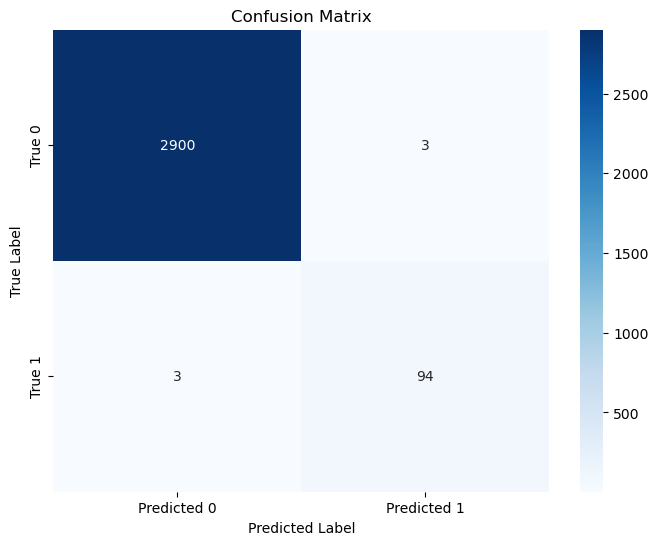

In [40]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_df = pd.DataFrame(conf_matrix, index=[f"True {i}" for i in range(conf_matrix.shape[0])],
                       columns=[f"Predicted {i}" for i in range(conf_matrix.shape[1])])


plt.figure(figsize=(8, 6))
sns.heatmap(conf_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [41]:
#quartile
import numpy as np
data = np.array(scores_dict['Score'])
q1 = np.percentile(data, 25)
q2 = np.percentile(data, 50)
q3 = np.percentile(data, 75)
IQR = q3 - q1

# Combine scores with SVM parameters
scores_dict['IQR'] = IQR

# Convert dictionary to DataFrame
scores_df = pd.DataFrame(scores_dict)

print(scores_df)

    Kernel   Score     IQR
0      rbf  0.9996  0.0226
1   linear  0.9996  0.0226
2     poly  0.9916  0.0226
3  sigmoid  0.9332  0.0226


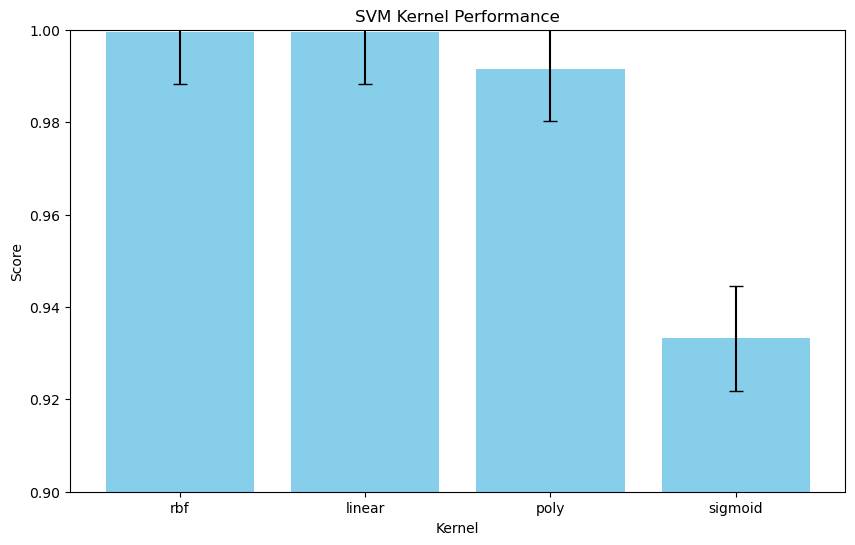

In [42]:
plt.figure(figsize=(10, 6))
plt.bar(scores_df['Kernel'], scores_df['Score'], yerr=scores_df['IQR']/2, capsize=5, color='skyblue')
plt.xlabel('Kernel')
plt.ylabel('Score')
plt.title('SVM Kernel Performance')
plt.ylim(0.9, 1.0)  # Set the y-axis limits for better visualization
plt.show()

In [43]:
df = pd.DataFrame(scores)

# Calculate quartiles
quartiles = pd.qcut(df['best_score'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Add quartile information to the DataFrame
df['Quartile'] = quartiles

# Deploy the DataFrame
print(df)

                 model  best_score           best_params Quartile
0        random_forest    0.998933  {'n_estimators': 10}       Q4
1  logistic_regression    0.979333              {'C': 1}       Q1


In [1]:
#Gaussian Naive Bayes model
import pickle
import numpy as np

# Load the pre-trained Gaussian Naive Bayes model using pickle
with open('nai4.pkl', 'rb') as file:
    model = pickle.load(file)

# Function to get user input
def get_user_input():
    print("Enter the following details:")
    UDI = int(input("UDI: "))
    Type = int(input("Type: "))
    air_temp = int(input("Air temperature [K]: "))
    process_temp = int(input("Process temperature [K]: "))
    speed = int(input("Rotational speed [rpm]: "))
    torque = int(input("Torque [Nm]: "))
    tool_wear = int(input("Tool wear [min]: "))
    TWF = int(input("TWF: "))
    HDF = int(input("HDF: "))
    PWF = int(input("PWF: "))
    OSF = int(input("OSF: "))
    RNF = int(input("RNF: "))
    
    return [UDI, Type, air_temp, process_temp, speed, torque, tool_wear, TWF, HDF, PWF, OSF, RNF]

# Function to preprocess user input if necessary
def preprocess_input(user_input):
    # You may need to preprocess your input data based on how you preprocessed your training data
    # This may include encoding categorical variables or scaling numerical variables
    # For Gaussian Naive Bayes, preprocessing might not be necessary as it assumes features are Gaussian distributed
    return user_input

# Function to make prediction
def make_prediction(user_input):
    prediction = model.predict([user_input])
    
    # Map
    if prediction == 1:
        return "YES"
    else:
        return "NO"
# Main function
def main():
    user_input = get_user_input()
    user_input_processed = preprocess_input(user_input)
    prediction = make_prediction(user_input_processed)
    print("Predicted outcome of machine failure:", prediction)

if __name__ == "__main__":
    main()
    

Enter the following details:
UDI: 1
Type: 0
Air temperature [K]: 300
Process temperature [K]: 300
Rotational speed [rpm]: 1551
Torque [Nm]: 15
Tool wear [min]: 10
TWF: 0
HDF: 0
PWF: 1
OSF: 0
RNF: 1
Predicted outcome of machine failure: YES


C:\Users\karju\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [ ]:
#random forest
import pickle
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the pre-trained Random Forest Classifier model using pickle
with open('random.pkl', 'rb') as file:
    model = pickle.load(file)

# Function to get user input
def get_user_input():
    print("Enter the following details:")
    UDI = int(input("UDI: "))
    Type = int(input("Type: "))
    air_temp = int(input("Air temperature [K]: "))
    process_temp = int(input("Process temperature [K]: "))
    speed = int(input("Rotational speed [rpm]: "))
    torque = int(input("Torque [Nm]: "))
    tool_wear = int(input("Tool wear [min]: "))
    TWF = int(input("TWF: "))
    HDF = int(input("HDF: "))
    PWF = int(input("PWF: "))
    OSF = int(input("OSF: "))
    RNF = int(input("RNF: "))
    
    return [UDI, Type, air_temp, process_temp, speed, torque, tool_wear, TWF, HDF, PWF, OSF, RNF]

# Function to preprocess user input
def preprocess_input(user_input):
    # No preprocessing needed for Random Forest Classifier
    return user_input

# Function to make prediction
def make_prediction(user_input):
    prediction = model.predict([user_input])
    return prediction

# Main function
def main():
    user_input = get_user_input()
    user_input_processed = preprocess_input(user_input)
    prediction = make_prediction(user_input_processed)
    if prediction == 1:
        print("Prediction: Machine Failure")
    else:
        print("Prediction: No Machine Failure")

if __name__ == "__main__":
    main()

Enter the following details:
UDI: 1
Type: 1
